<a href="https://colab.research.google.com/github/vaskiax/Evaluacion_2021-2/blob/main/1017259461/entregas/basic_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

1. A mass connected to a spring is moved to an initial position A from where it is released. Then the mass starts moving, consider the initial time equal to zero. Find the evolution of the system considering that obeys the following expressions


\begin{eqnarray*}
X(t) &=& +A \cos(\omega t)\\
V(t) &=& -A\omega\sin(\omega t)\\
a(t) &=& -A\omega^2\cos(\omega t) 
\end{eqnarray*}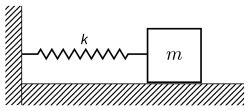

Make a plot of the evolution of the position, velocity and acceleration of the system. Feel free to choose the parameters you prefer.

It can be also shown that the potential and kinetic energy of the system is given by

 \begin{eqnarray*}
E_p &=& \frac{1}{2}kX^2\\
E_k &=& \frac{1}{2}mV^2
\end{eqnarray*}
 
 
Make a plot of the potential energy and the total energy obtained for every step of the iteration.

##First Step - Importing Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt

##Second Step - Defining Functions

In [3]:
x = lambda A,w,t: A*np.cos(w*t)
v = lambda A,w,t: -A*w*np.sin(w*t)
a = lambda A,w,t: -A*(w**2)*np.cos(w*t)
Ep = lambda k,x: 0.5*k*(x**2)
Ec = lambda m,v: 0.5*m*(v**2) 

##Creating time vectors and defining some constants  

In [19]:
time = np.arange(0,10,0.001)
w = 1.5
A = 5
k = 0.66
m = 3.5

##Plotting

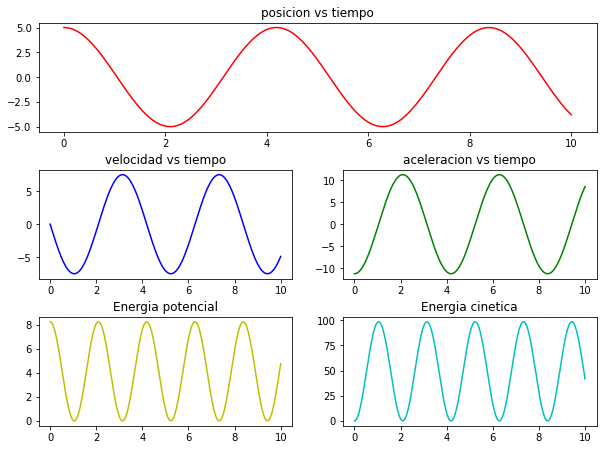

In [42]:
positions = [x(A,w,i) for i in time]
velocities = [v(A,w,i) for i in time]
accelerations = [a(A,w,i) for i in time]

fig = plt.figure(figsize=(10,7))

axs_1 = fig.add_subplot(311)
axs_2 = fig.add_subplot(323)
axs_3 = fig.add_subplot(324)
axs_4 = fig.add_subplot(325)
axs_5 = fig.add_subplot(326)

axs_1.plot(time, positions, "-r")
axs_2.plot(time, velocities, "-b")
axs_3.plot(time, accelerations, "-g")
axs_4.plot(time, [Ep(k,i) for i in positions], "-y")
axs_5.plot(time, [Ec(m,i) for i in velocities], "-c")

axs_1.set_title("posicion vs tiempo")
axs_2.set_title("velocidad vs tiempo")
axs_3.set_title("aceleracion vs tiempo")
axs_4.set_title("Energia potencial")
axs_5.set_title("Energia cinetica")

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

for ax in axs.flat:
    ax.label_outer()

#Problem 2

Write a program that evals a function $f(x) = \sin(x) \ln(1x+1) \sinh(x)$ in the interval $[0,...,10]$. The function must receive the step $dx$ for the sucesive evaluations. The result must be written in a file of 3 columns, the first one is the value i of the counter of the cycle for, the second one is x and the third one is f(x). Make the same program but using numpy arrays properties.

##Defining the function

In [68]:
def F (dx):

  from pandas import DataFrame
  
  f_x = lambda x: np.sin(x)*np.log(x+1)*np.sinh(x)
  interval = np.arange(0,10,dx)
  
  table = {"X value": [i for i in interval],
           "F(x)": [f_x(i) for i in interval]}
  
  data = DataFrame(table, index = [i+1 for i in range(len(interval))])

  return data.to_excel("datos_de_la_función.xlsx")

##Testing

In [69]:
F(0.1)

#Problema 3

Plot the series sine and cosine using 3 different values N ( N is the last term taken of the series ). Comparing with the function sine and cosine, say which approximation, which value of N, is sufficient as an approximation.
\begin{eqnarray*}
\sin(x) &=& \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1} \\
\cos(x) &=& \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n}
\end{eqnarray*}

##Defining the series

In [71]:
my_sine = lambda x, N: sum([(((-1)**i)/(np.math.factorial(2*i + 1)))*((x)**(2*i+1)) for i in range(0,N+1)])
my_cosine = lambda x, N: sum([(((-1)**i)/(np.math.factorial(2*i)))*((x)**(2*i)) for i in range(0,N+1)])

##Testing

In [76]:
a,b,c = np.pi, np.pi/2, np.pi/4

print("""

Para la aproximacion por series se tiene que:

""")

print(f"Seno y Coseno para a hasta 100 es {(my_sine(a,100)), my_cosine(a,100)}",
      f"Seno y Coseno para b hasta 1000 es {(my_sine(b,50)), my_cosine(b,50)}",
      f"Seno y Coseno para c hasta 10000 es {(my_sine(c,10)), my_cosine(c,10)}",
      sep="\n\n")


print("""

Para el resultado por funciones se tiene:

""")

print(f"Seno y Coseno para a es {(np.sin(a), np.cos(a))}",
      f"Seno y Coseno para b es {(np.sin(b), np.cos(b))}",
      f"Seno y Coseno para c es {(np.sin(c), np.cos(c))}",
      sep="\n\n")



Para la aproximacion por series se tiene que:


Seno y Coseno para a hasta 100 es (3.466291415164506e-16, -1.000000000000001)

Seno y Coseno para b hasta 1000 es (1.0000000000000002, -1.296829575562107e-17)

Seno y Coseno para c hasta 10000 es (0.7071067811865475, 0.7071067811865475)


Para el resultado por funciones se tiene:


Seno y Coseno para a es (1.2246467991473532e-16, -1.0)

Seno y Coseno para b es (1.0, 6.123233995736766e-17)

Seno y Coseno para c es (0.7071067811865475, 0.7071067811865476)


#Problem 4

Write a program that calculates the factorial of a given number

##Defining the function

In [89]:
def my_factorial (n):
  
  if n == 0:
    return 1
  
  else:
    
    initial = n + 1 
    fac = n*1
    tries = 0
    
    while n > 1:
      n -= 1
      fac *= n
      tries += 1
      
      if tries >  initial:
        break   
    
    return fac

##Testing

In [92]:
my_factorial(10)

3628800